In [129]:
 # Dados _ Penalidades aplicadas a operadoras

# O conjunto de dados não contempla as arrecadações a partir de maio de 2018 dos valores inscritos em Dívida, data em que 
# esses recebimentos passaram a ser controlados pelo SAPIENS, sistema utilizado pela Procuradoria-Geral Federal 
# Estão incluídos apenas os processos sancionadores nos quais foi aplicada multa em primeira ou segunda instância,
# mesmo que já tenha sido cancelada. Foram excluídos os pagamentos referentes às GRUs arrecadadas em Dívida Ativa.

In [6]:
# importando o pandas
import pandas as pd

In [7]:
# importando pacotes para graficos
import matplotlib.pyplot as plt

In [8]:
from datetime import date

In [9]:
import seaborn as sns

In [10]:
path = "C:/Users/rodrigo/Desktop/DATA-SCIENCE-E-BUSINESS-INTELLIGENCE/turma2/datasets/"

In [11]:
df_mark = pd.read_csv(path + 'penalidades_aplicadas_a_operadoras.csv',sep=';', encoding='ISO-8859-1')

In [12]:
df_mark.head()

,NR_DEMANDA,NR_PROCESSO,TIPO_PROCESSO,OBJETO,CD_OPERADORA,CNPJ,RAZAO_SOCIAL,SITUACAO_OPERADORA,STATUS_DEMANDA,DT_DECISAO_1A,...,DE_SITUACAO_GRU,DT_PAGTO_A_VISTA_ANS,VL_PAGO_A_VISTA_ANS,DT_VENC_1A_PARC_ANS,VL_PARCELAS_ANS_PAGAS,STATUS_PARCELAMENTO,DT_INSCRICAO,INSCRITO_DA,ORIGEM_PAGAMENTO,NR_COMPETENCIA_CARGA
0,6041550,33910.024846/2024-15,Consumidor,NaN,359017.0,44.649.812/0001-38,Notre Dame Intermédica Saúde S.A.,1.0,Em Cobrança,30/09/2024,...,Pendente,NaN,NaN,NaN,NaN,NaN,NaN,NAO,ANS,202410
1,5423853,33910.013664/2022-49,Consumidor,NaN,359017.0,44.649.812/0001-38,Notre Dame Intermédica Saúde S.A.,1.0,Arquivado,05/04/2024,...,Pago,08/05/2024,144000.0,NaN,NaN,NaN,NaN,NAO,ANS,202410
2,5735088,33910.039446/2022-34,Consumidor,NaN,359017.0,44.649.812/0001-38,Notre Dame Intermédica Saúde S.A.,1.0,Aguardando Recurso da Operadora,17/09/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NAO,NaN,202410
3,395120,33902.163358/2005-51,Consumidor,NaN,359556.0,36.184.695/0001-56,Massa Falida De Policlinica Amhavre Ltda,2.0,Em Cobrança,13/05/2009,...,Pendente,NaN,NaN,NaN,NaN,NaN,05/08/2013,SIM,DA,202410
4,5186750,33910.030421/2021-94,Consumidor,NaN,359017.0,44.649.812/0001-38,Notre Dame Intermédica Saúde S.A.,1.0,Arquivado,20/09/2021,...,Pago,25/10/2021,18000.0,NaN,NaN,NaN,NaN,NAO,ANS,202410


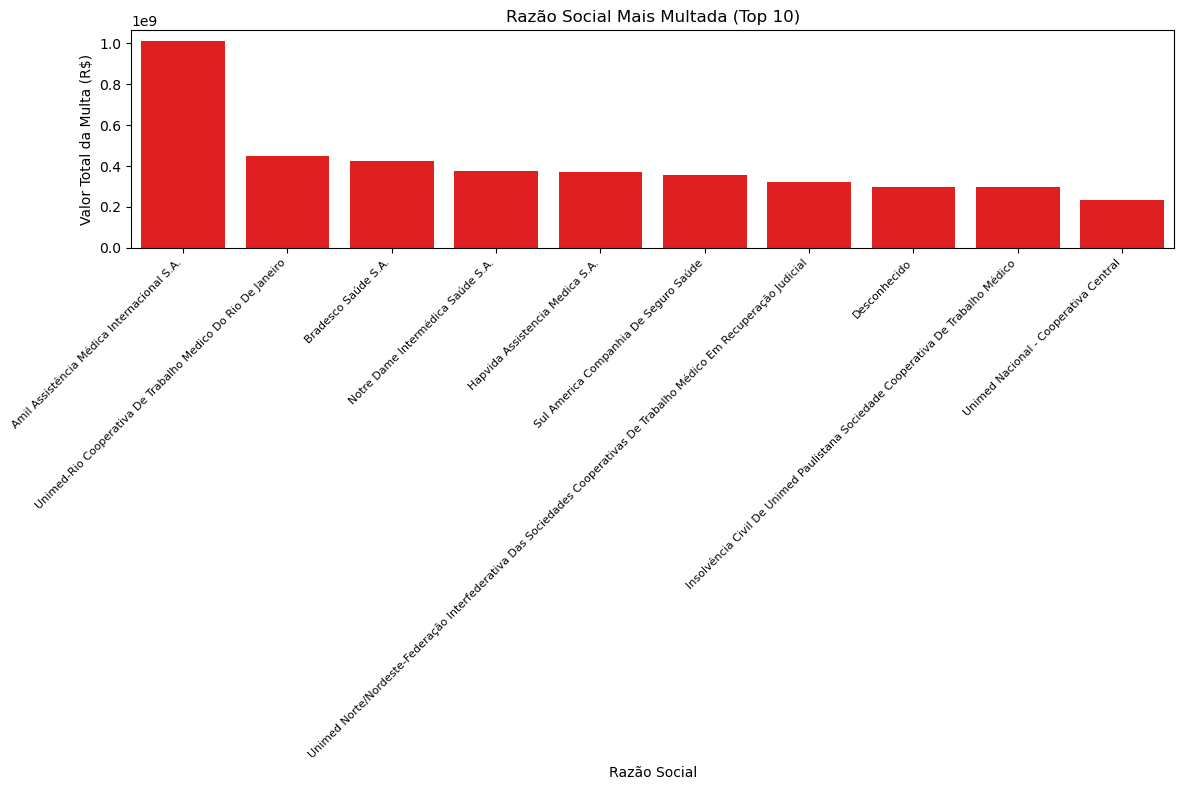

In [18]:
df_mark['RAZAO_SOCIAL'] = df_mark['RAZAO_SOCIAL'].fillna('Desconhecido')
df_mark['VL_TOTAL_APLICADO_1A'] = pd.to_numeric(df_mark['VL_TOTAL_APLICADO_1A'], errors='coerce')
df_mark = df_mark.dropna(subset=['VL_TOTAL_APLICADO_1A'])

# Agrupar, ordenar e selecionar top 10
df_agrupado = (df_mark.groupby('RAZAO_SOCIAL')['VL_TOTAL_APLICADO_1A']
               .sum()
               .nlargest(10)
               .reset_index())

# Criar gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=df_agrupado, x='RAZAO_SOCIAL', y='VL_TOTAL_APLICADO_1A', color='red')
plt.title('Razão Social Mais Multada (Top 10)')
plt.xlabel('Razão Social')
plt.ylabel('Valor Total da Multa (R$)')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Reduz o tamanho da fonte
plt.tight_layout()
plt.show()


C:\Users\rodrigo\AppData\Local\Temp\ipykernel_13276\2172820293.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


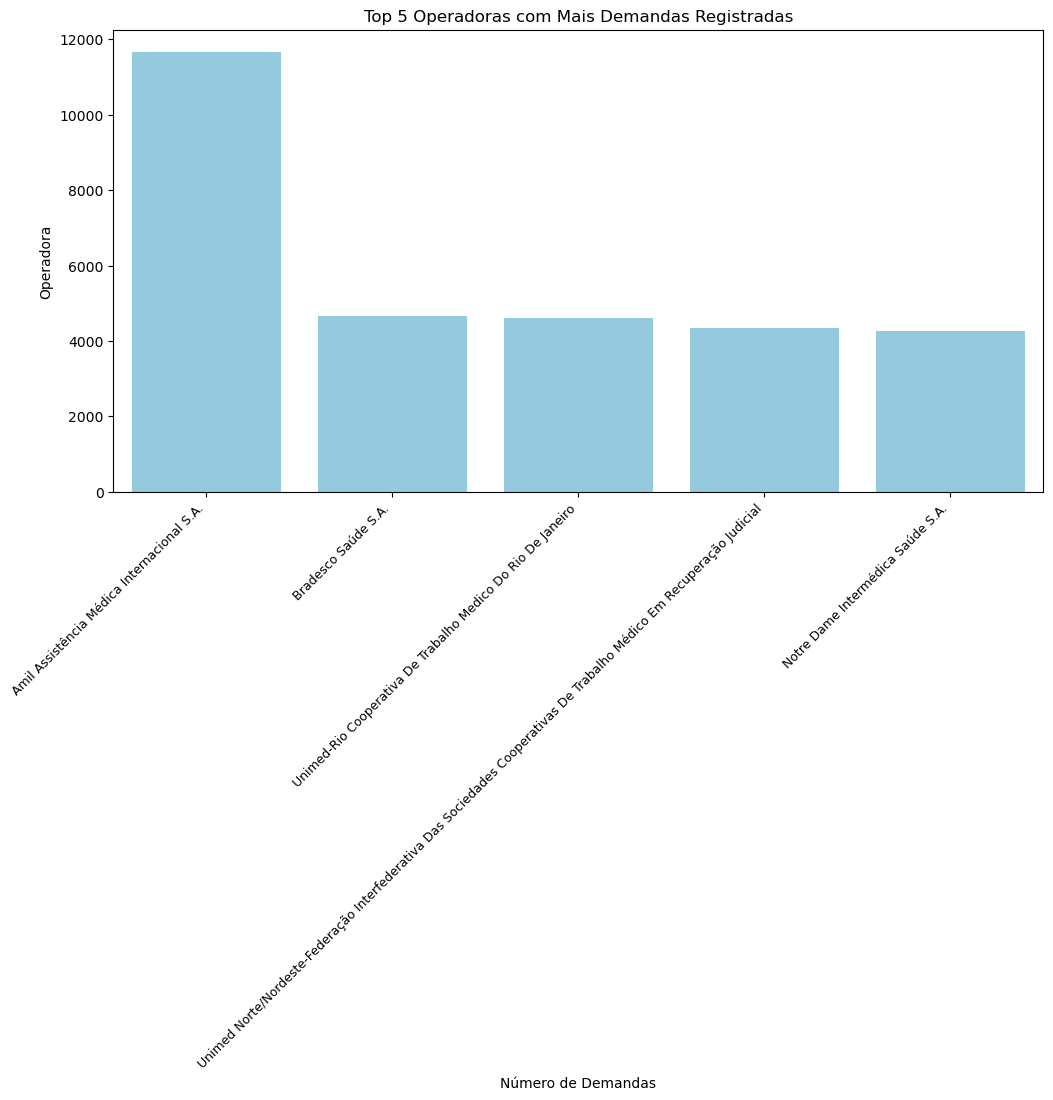

In [34]:
# Contar o número de demandas por operadora
df_demandas = df_mark['RAZAO_SOCIAL'].value_counts().head(5).reset_index()
df_demandas.columns = ['RAZAO_SOCIAL', 'NUMERO_DEMANDAS']

# Exibir as 5 operadoras com mais demandas
plt.figure(figsize=(12, 6))
sns.barplot(x='RAZAO_SOCIAL', y='NUMERO_DEMANDAS', data=df_demandas, color='skyblue')
plt.title('Top 5 Operadoras com Mais Demandas Registradas')
plt.ylabel('Operadora')
plt.xlabel('Número de Demandas')
plt.xticks(rotation=45, ha='right', fontsize=9)  # Reduz o tamanho da fonte
plt.tight_layout()
plt.show()


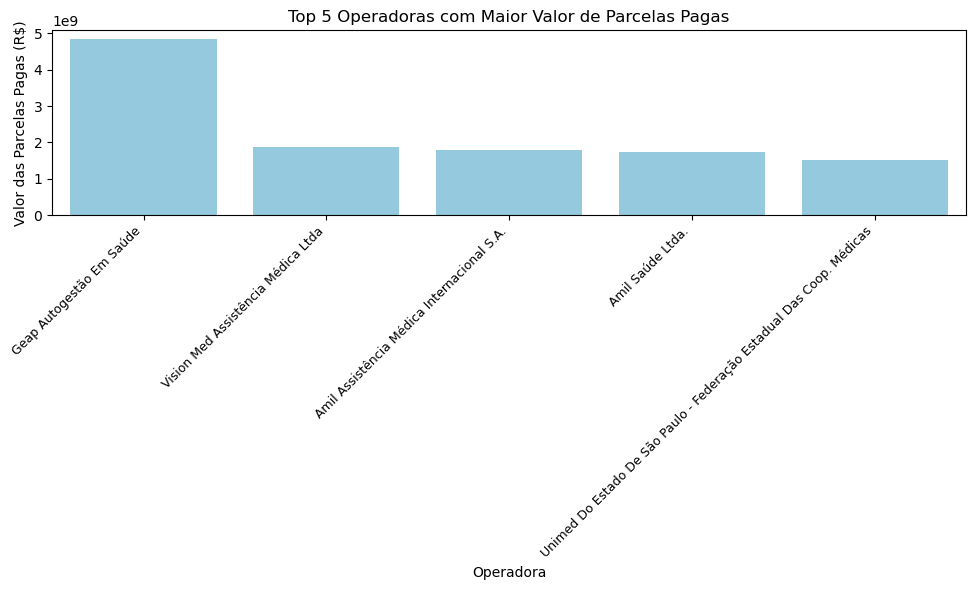

In [36]:
# Agrupar por operadora e somar os valores das parcelas pagas
df_parcelas = df_mark.groupby('RAZAO_SOCIAL')['VL_PARCELAS_ANS_PAGAS'].sum().reset_index()

# Ordenar e selecionar as top 5 operadoras
df_top_parcelas = df_parcelas.sort_values(by='VL_PARCELAS_ANS_PAGAS', ascending=False).head(5)

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='RAZAO_SOCIAL', y='VL_PARCELAS_ANS_PAGAS', data=df_top_parcelas, color='skyblue')
plt.title('Top 5 Operadoras com Maior Valor de Parcelas Pagas')
plt.xlabel('Operadora')
plt.ylabel('Valor das Parcelas Pagas (R$)')
plt.xticks(rotation=45, ha='right',fontsize=9)
plt.tight_layout()
plt.show()

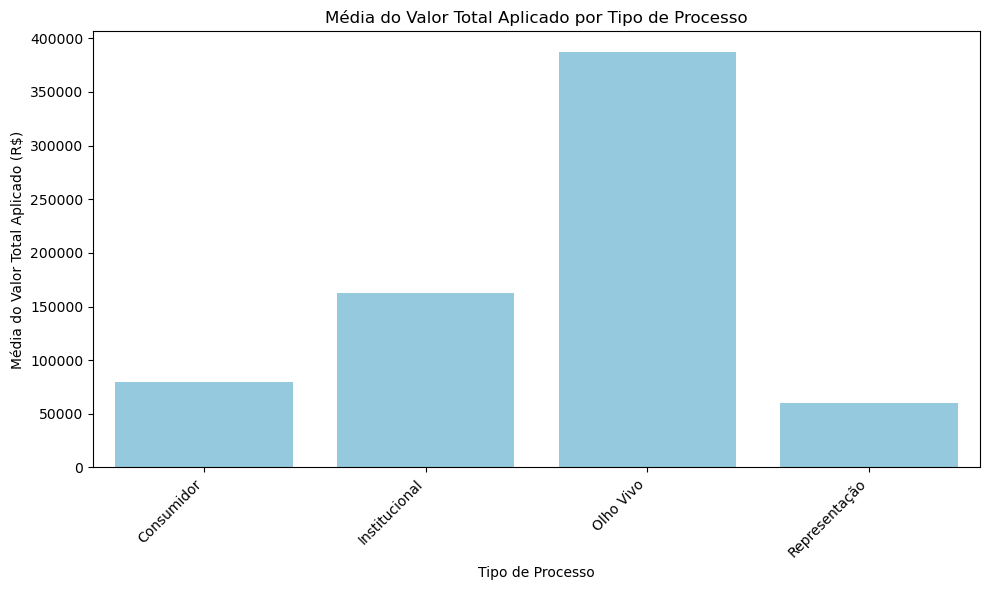

In [37]:
# Calcular a média do valor total aplicado por tipo de processo
df_media_tipo = df_mark.groupby('TIPO_PROCESSO')['VL_TOTAL_APLICADO_1A'].mean().reset_index()

# Exibir o resultado
plt.figure(figsize=(10, 6))
sns.barplot(x='TIPO_PROCESSO', y='VL_TOTAL_APLICADO_1A', data=df_media_tipo, color='skyblue')
plt.title('Média do Valor Total Aplicado por Tipo de Processo')
plt.xlabel('Tipo de Processo')
plt.ylabel('Média do Valor Total Aplicado (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


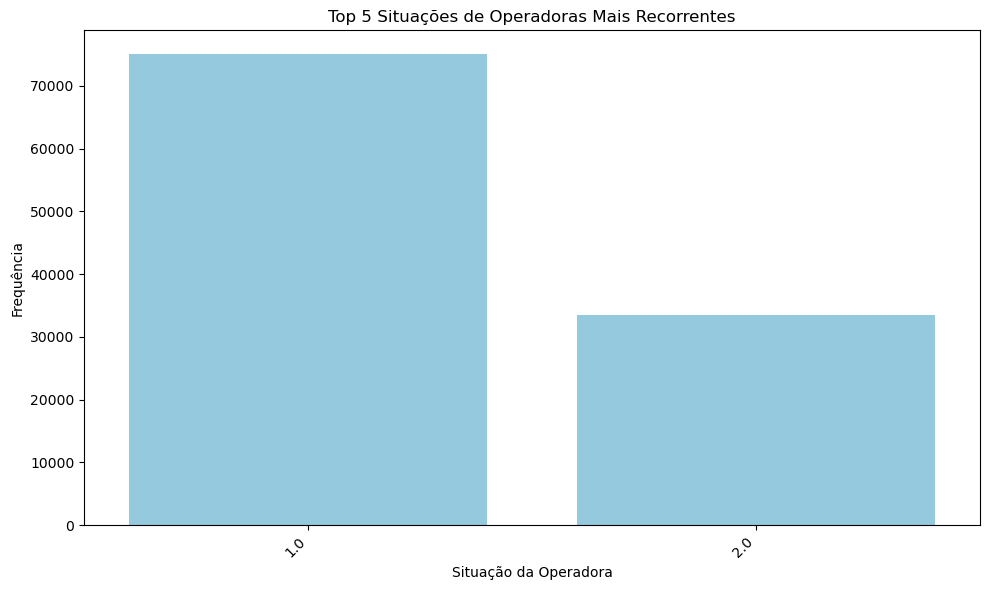

In [38]:
# Contar as situações mais recorrentes
df_situacoes = df_mark['SITUACAO_OPERADORA'].value_counts().head(5).reset_index()
df_situacoes.columns = ['SITUACAO_OPERADORA', 'FREQUENCIA']

# Exibir o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='SITUACAO_OPERADORA', y='FREQUENCIA', data=df_situacoes, color='skyblue')
plt.title('Top 5 Situações de Operadoras Mais Recorrentes')
plt.xlabel('Situação da Operadora')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
